In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/ITMO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('train.csv')
sns.set_theme(style="whitegrid", palette="muted")

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITMO


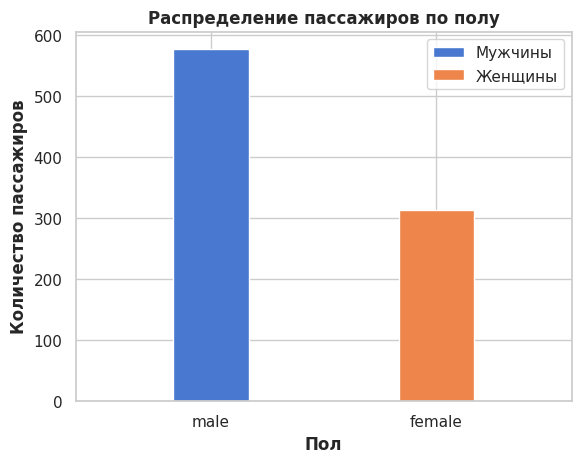

In [2]:
## Распределение пассажиров по полу
df_male = df[df['Sex'] == 'male']
df_female = df[df['Sex'] == 'female']

plt.hist(df_male['Sex'], bins=3)
plt.hist(df_female['Sex'], bins=3)

plt.title('Распределение пассажиров по полу', fontweight='bold')
plt.xlabel("Пол", fontweight='bold')
plt.ylabel("Количество пассажиров", fontweight='bold')
plt.legend(['Мужчины', 'Женщины'])

plt.show()

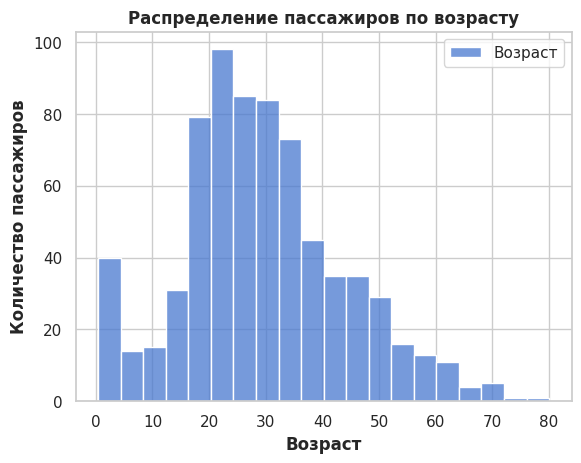

In [3]:
## Распределение пассажиров по возрасту
Age = df['Age']
fig, ax = plt.subplots()
sns.histplot(Age)
ax.set_title('Распределение пассажиров по возрасту', fontweight='bold')
ax.set_xlabel('Возраст', fontweight='bold')
ax.set_ylabel('Количество пассажиров', fontweight='bold')
ax.legend(['Возраст'])
plt.show()


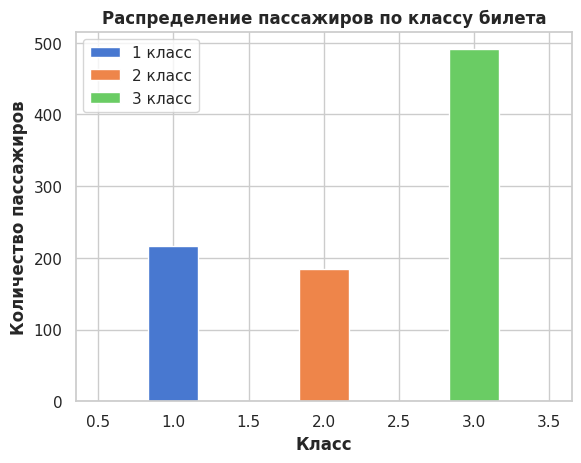

In [4]:
## Распределение пассажиров по классу билета
df = pd.read_csv('train.csv')

df1 = df[df['Pclass'] == 1]
df2 = df[df['Pclass'] == 2]
df3 = df[df['Pclass'] == 3]

plt.hist(df1['Pclass'], bins=3)
plt.hist(df2['Pclass'], bins=3)
plt.hist(df3['Pclass'], bins=3)

plt.title('Распределение пассажиров по классу билета', fontweight='bold')
plt.xlabel("Класс", fontweight='bold')
plt.ylabel("Количество пассажиров", fontweight='bold')
plt.legend(['1 класс', '2 класс', '3 класс'])
plt.show()

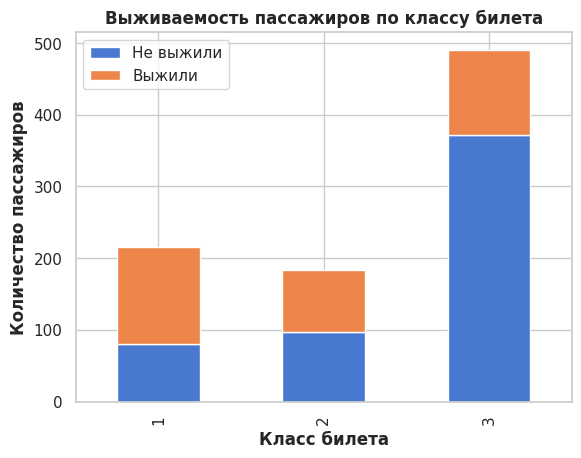

In [5]:
## Выживаемость пассажиров по классу билета
Survived = df.groupby(['Pclass', 'Survived']).size().unstack()
Survived.plot(kind='bar', stacked=True )

plt.title('Выживаемость пассажиров по классу билета', fontweight='bold')
plt.xlabel("Класс билета", fontweight='bold')
plt.ylabel("Количество пассажиров", fontweight='bold')
plt.legend(['Не выжили', 'Выжили'])
plt.show()

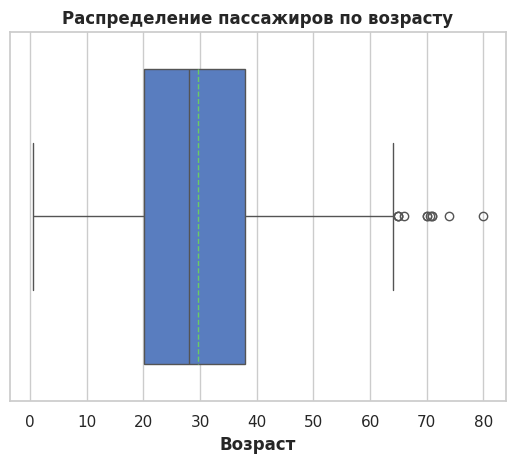

Интерпретация:
- медианное значение возраста пассажиров равно примерно 32 годам
- среднее значение возраста пассажиров равно примерно 30 годам
- первый квартиль показывает, что 25% пассажиров имеют возраст порядка 20 лет
- третий квартиль показывает, что 25% пассажиров имеют возраст порядка 38 лет
- межквартильный диапазон (IQR) показывает, что 50% пассажиров имеют возраст в диапазоне от 20 до 38 лет
- минимальный возраст (высчитанный) равер примерно 1,5 года, максимальный возраст (высчитанный) равер примерно 64 годам
- существуют выбросы сверх максимального возраста, самый большой из них равен 80 годам


In [6]:
Age_boxplot = df['Age']
fig, ax = plt.subplots()
sns.boxplot(Age_boxplot, orient='h', showmeans=True, meanline=True)
ax.set_title('Распределение пассажиров по возрасту', fontweight='bold')
ax.set_xlabel('Возраст', fontweight='bold')
plt.show()

print("Интерпретация:")
print("- медианное значение возраста пассажиров равно примерно 32 годам")
print("- среднее значение возраста пассажиров равно примерно 30 годам")
print("- первый квартиль показывает, что 25% пассажиров имеют возраст порядка 20 лет")
print("- третий квартиль показывает, что 25% пассажиров имеют возраст порядка 38 лет")
print("- межквартильный диапазон (IQR) показывает, что 50% пассажиров имеют возраст в диапазоне от 20 до 38 лет")
print("- минимальный возраст (высчитанный) равер примерно 1,5 года, максимальный возраст (высчитанный) равер примерно 64 годам")
print("- существуют выбросы сверх максимального возраста, самый большой из них равен 80 годам")



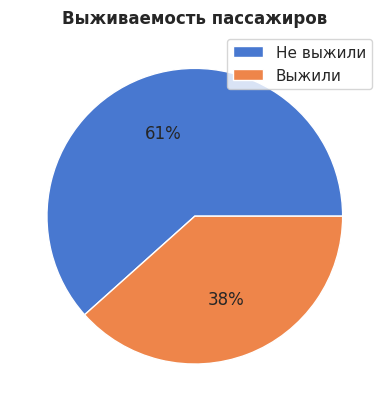

In [7]:
S = df.groupby(['Survived']).size()
plt.subplot(aspect=True)
plt.pie(S, autopct='%i%%')
plt.title("Выживаемость пассажиров", fontweight='bold')
plt.legend(['Не выжили', 'Выжили'])
plt.show()

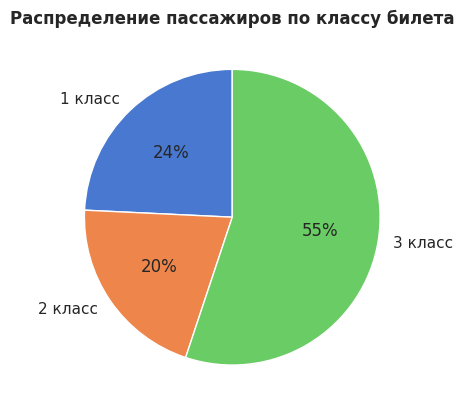

In [8]:
P = df.groupby(['Pclass']).size()
plt.subplot(aspect=True)
labels = ['1 класс', '2 класс', '3 класс']
plt.pie(P, autopct='%i%%', labels = labels, startangle=90)
plt.title("Распределение пассажиров по классу билета", fontweight='bold')
plt.show()

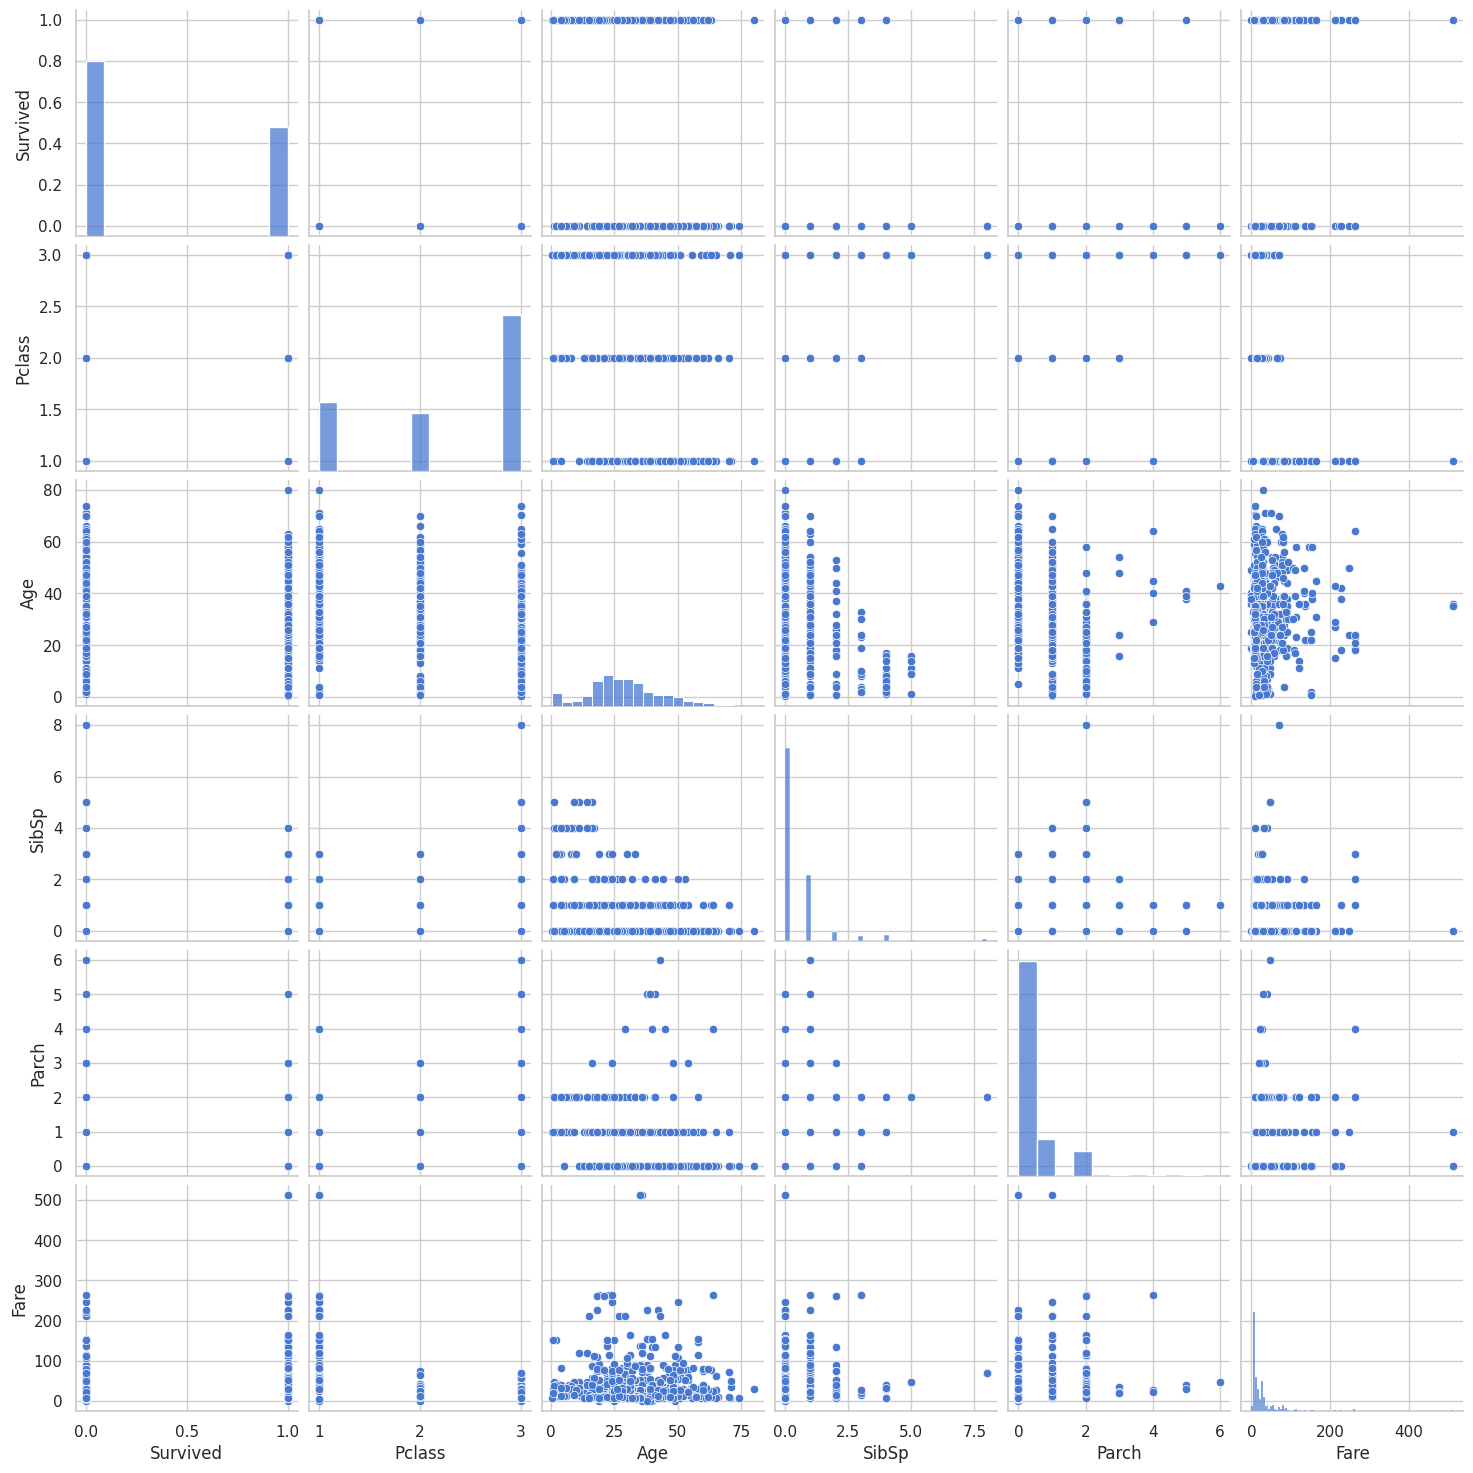

In [9]:
df1 = df[['Survived',	'Pclass',	'Age',	'SibSp',	'Parch', 'Fare']]
sns.pairplot(df1)
plt.show()

In [10]:
counts = df.groupby(['Pclass', 'Sex']).size().reset_index(name='count')
counts['path'] = counts['Pclass'].astype(str) + '/' + counts['Sex']
fig = px.sunburst(
    counts,
    path=['Pclass', 'Sex'],
    values='count',
    color='Pclass',
    title='Распределение пассажиров по классу и полу', template='ggplot2'
)
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(font=dict(size=16))
fig.show()